<div style="background-color:#600170; color:#fff; padding:10px; border-radius:5px; display: flex; justify-content: center; align-items: center; position: relative;">
    <div style="font-size:60px; font-weight:bold;">Exploratory Data Analysis</div>
</div>
<br>
<p>Tijdens de testdagen op vrijdag is er ook de mogelijkheid om data op te nemen van de kart. In dit bestand wordt er dieper in de data gedoken en zal er worden gekeken hoe de opgenomen data in elkaar steekt.<p>

-- Inhoudsopgave? --

<div style="background-color:#600170; color:#fff; padding:10px; border-radius:5px; display: flex; justify-content: center; align-items: center; position: relative;">
    <div style="font-size:40px; font-weight:bold;">Inladen van libaries en data</div>
</div>
<br>
<p>Om de data te kunnen onderzoeken is het belangrijk dat alle nodige libaries ervoor worden geinstalleerd. Naast de standaard libaries is er ook een `.py` bestand aanwezig in de GitHug, in dit bestand staan diverse functies die zijn ontwikkelt voor gebruik in het notebook. Deze zijn vervolgens in een `.py` bestand gezet om te zorgen dat ze voor elk bestand beschikbaar worden.<p>

In [2]:
from functies.eda import *

Aan de hand van deze libaries zou het mogelijk moeten zijn om de bestanden in te laden. De bestanden die worden opgenomen met de kart zijn te vinden op een externe harde schrijf. Om het inladen van de huidige en toekomstige data makkelijker te maken, is er een functie aangemaakt.

In [2]:
## df, front, left, right = data_loader("D:/recording 15-03")

Omdat de bovenste code niet werkt met de grote hoeveelheid aan afbeeldingen zal de data zelfstandig worden ingeladen.

<div style="background-color:#600170; color:#fff; padding:10px; border-radius:5px; display: flex; justify-content: center; align-items: center; position: relative;">
    <div style="font-size:40px; font-weight:bold;">Inladen en bekijken van de tabel data</div>
</div>
<br>
Om de data toch goed te kunnen bekijken is het nodig om alle bestanden apart in te laden. Daardoor zal eerst het csv bestand worden bekeken. Om dit succesvol te doen is eerst het csv bestand bekeken, om uit te vinden welke seperator er is gebruikt om de data te scheiden.

In [3]:
df = pd.read_csv("D:/recording 15-03/recording.csv", sep="|")

Met het dataframe kan gekeken worden welke data op elk opgenomen timestamp is gedetecteerd. Om hierover wat snelle, simpele informatie te winnen zullen de `.info()`, `.describe()` en `.head()` methoden worden gebruikt.

In [4]:
# Tonen van basis informatie in DataFrame
print("Basis informatie DataFrame:")
display(df.info())

# Opsomming van statistieken
print("\nOpsomming van statistieken:")
display(df.describe())

# Eerste vijf rijen tonen
print("\nEerste rijen in DataFrame:")
display(df.head())

Basis informatie DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74222 entries, 0 to 74221
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       74221 non-null  float64
 1   Steering        71853 non-null  float64
 2   SteeringSpeed   71853 non-null  float64
 3   Throttle        71853 non-null  float64
 4   Brake           71853 non-null  float64
 5   SteeringSensor  74221 non-null  float64
dtypes: float64(6)
memory usage: 3.4 MB


None


Opsomming van statistieken:


,Timestamp,Steering,SteeringSpeed,Throttle,Brake,SteeringSensor
count,7.422100e+04,71853.000000,71853.0,71853.000000,71853.000000,74221.000000
mean,1.710498e+09,-0.036074,49920.0,0.675270,0.028307,-26.688606
std,7.160498e+02,0.441832,0.0,0.461674,0.163768,254.300138
min,1.710497e+09,-1.000000,49920.0,0.000000,0.000000,-728.000000
25%,1.710497e+09,0.000000,49920.0,0.000000,0.000000,-18.000000
50%,1.710498e+09,0.000000,49920.0,1.000000,0.000000,0.000000
75%,1.710498e+09,0.000000,49920.0,1.000000,0.000000,4.000000
max,1.710499e+09,0.999970,49920.0,1.000000,1.000000,725.000000



Eerste rijen in DataFrame:


,Timestamp,Steering,SteeringSpeed,Throttle,Brake,SteeringSensor
0,1.710497e+09,NaN,NaN,NaN,NaN,-18.0
1,1.710497e+09,NaN,NaN,NaN,NaN,-18.0
2,1.710497e+09,NaN,NaN,NaN,NaN,-18.0
3,1.710497e+09,NaN,NaN,NaN,NaN,-18.0
4,1.710497e+09,NaN,NaN,NaN,NaN,-18.0


Er zijn missende en nulwaarden in de data. Hier moet naar gekeken worden om begrip te ontwikkelen om te begrijpen wat de nulwaarden betekenen.

Kijken naar de verschillende waarden in steering, throttle en brake op selecte ronden.

In [14]:
data = data_selection(df, 1710497052, 1710497155)

<Axes: xlabel='Timestamp', ylabel='Steering'>

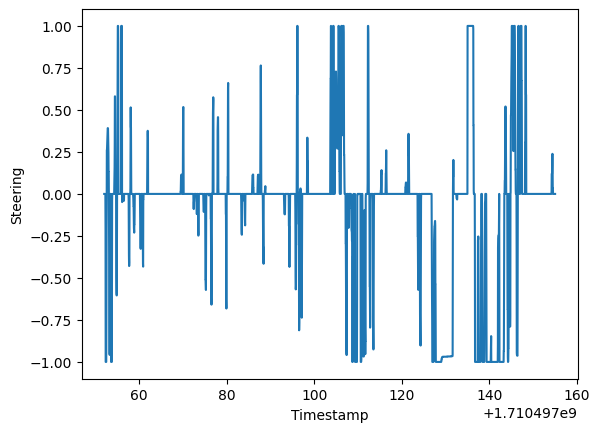

In [18]:
import seaborn as sns

sns.lineplot(
    data=data, x="Timestamp",
    y="Steering"
)

<Axes: xlabel='Timestamp', ylabel='Throttle'>

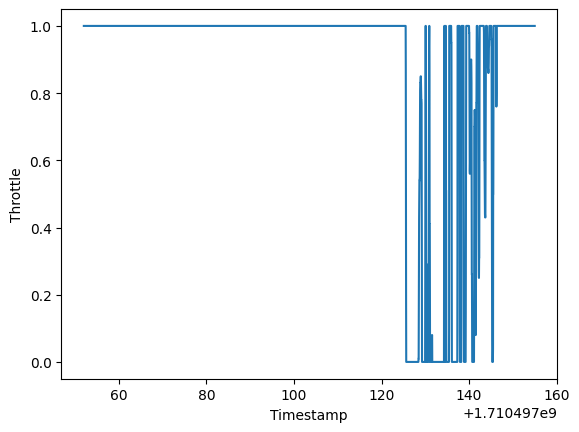

In [19]:

sns.lineplot(
    data=data, x="Timestamp",
    y="Throttle"
)

<Axes: xlabel='Timestamp', ylabel='Brake'>

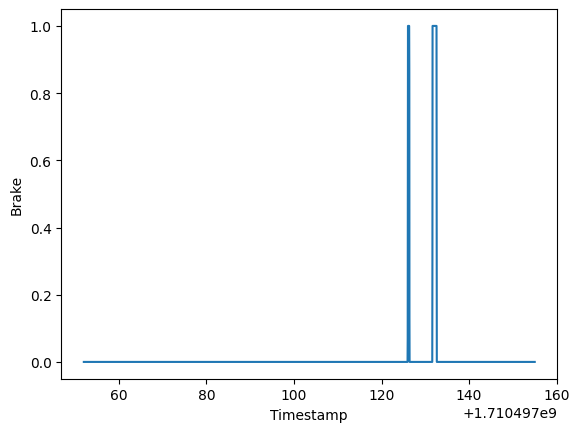

In [20]:

sns.lineplot(
    data=data, x="Timestamp",
    y="Brake"
)

<div style="background-color:#600170; color:#fff; padding:10px; border-radius:5px; display: flex; justify-content: center; align-items: center; position: relative;">
    <div style="font-size:40px; font-weight:bold;">Inladen en bekijken van de afbeeldingen</div>
</div>
<br>
Naast het csv bestand zijn er ook erg veel foto's opgenomen in Lelystad. In dit gedeelte worden verschillende aspecten van de afbeeldingen bekeken.

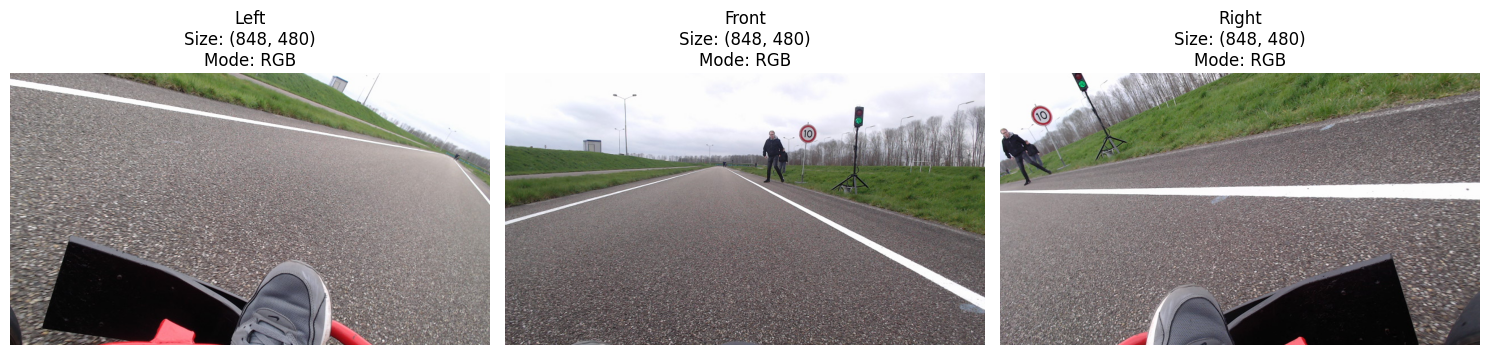

,Timestamp,Steering,SteeringSpeed,Throttle,Brake,SteeringSensor
49352,1.710498e+09,-0.20539,49920.0,1.0,0.0,-86.0


In [5]:
folder = "D:/recording 15-03"
image = 1710498235.9130464

image_overview(folder, image)

In [6]:
data = data_selection(df, 1710498415, 1710498524)
len(data)

3262

In [7]:
images = load_images(data, "D:/recording 15-03/front")

2842 / 3262 afbeeldingen zijn ingeladen.


In [8]:
img_to_vid(images, "Testvid-30.mp4", data)